In [77]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

import random

random.seed(42)
np.random.seed(42)

In [78]:
# load the data

df = pd.read_csv("../Data/Portfolio.csv")
df.head()

,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line
0,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,2.945385,18.709999,0,3.295837
1,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,2.945385,18.709999,0,2.995732
2,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,2.945385,18.709999,0,3.295837
3,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,2.945385,18.709999,1,3.178054
4,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,2.945385,18.709999,0,2.772589


In [79]:
df['default'].value_counts()

default
0    659
1     17
Name: count, dtype: int64

In [80]:
# load the model

model = joblib.load('../Models/LogisticRegression.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'total_acc', 'pct_tl_nvr_dlq', 'GDP', 'VIX',
       'years_since_first_cr_line'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   BinningProcess(variable_names=['term',
                                                                                                  'grade',
                                                                                                  'home_ownership',
                                                                                                  'purpose',
                                                                                                  'pub_rec_bankruptcies']))]),
                                                  Index(['term', 'grade', 'home_ownership', 'purpose', 'pub_rec_bankruptcies'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [81]:
# load macroeconomic variables

macro = pd.read_csv("../Data/Macro.csv")
macro.head()

,GDP,Date,VIX
0,NaN,2006-12-01,NaN
1,2.782811,2007-01-01,11.56
2,2.782811,2007-02-01,10.42
3,2.782811,2007-03-01,15.42
4,2.782811,2007-04-01,14.64


Gnerate new observations of the the loans issued in September 2020 by replacing the GDP growth rate and the VIX with new values coming from macroeconomic data.

In [82]:
macro_subset = macro.loc[(macro['Date'] >= '2019-06-01') & (macro['Date'] <= '2021-12-01')]

macro_subset.shape

(31, 3)

In [83]:
macro_subset

,GDP,Date,VIX
150,2.945385,2019-06-01,18.709999
151,2.945385,2019-07-01,15.080000
152,2.945385,2019-08-01,16.120001
153,2.945385,2019-09-01,18.980000
154,2.945385,2019-10-01,16.240000
155,2.945385,2019-11-01,13.220000
156,2.945385,2019-12-01,12.620000
157,2.294439,2020-01-01,13.780000
158,2.294439,2020-02-01,18.840000
159,2.294439,2020-03-01,40.110001


In [84]:
# give identifier to the loans in the portfolio

df['ID'] = range(1, len(df) + 1)
# move it to the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line
0,1,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,2.945385,18.709999,0,3.295837
1,2,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,2.945385,18.709999,0,2.995732
2,3,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,2.945385,18.709999,0,3.295837
3,4,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,2.945385,18.709999,1,3.178054
4,5,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,2.945385,18.709999,0,2.772589


In [85]:
# Expand the portfolio dataframe
expanded_portfolio_df = df.loc[df.index.repeat(len(macro_subset))]
expanded_portfolio_df = expanded_portfolio_df.reset_index(drop=True)

expanded_portfolio_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line
0,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
1,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
2,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
3,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
4,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759
20952,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759
20953,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759
20954,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759


In [86]:
# Add a date column to match the macroeconomic data
expanded_portfolio_df['Date'] = list(macro_subset['Date']) * len(df)
expanded_portfolio_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line,Date
0,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-06-01
1,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-07-01
2,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-08-01
3,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-09-01
4,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2021-08-01
20952,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2021-09-01
20953,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2021-10-01
20954,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2021-11-01


In [87]:
# drop GDP and VIX from portfolio
expanded_portfolio_df = expanded_portfolio_df.drop(columns=['GDP', 'VIX'])

In [88]:
# Merge the dataframes
merged_df = pd.merge(expanded_portfolio_df, macro_subset, on='Date')
merged_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,default,years_since_first_cr_line,Date,GDP,VIX
0,1,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999
1,2,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,0,2.995732,2019-06-01,2.945385,18.709999
2,3,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999
3,4,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,1,3.178054,2019-06-01,2.945385,18.709999
4,5,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,0,2.772589,2019-06-01,2.945385,18.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,672,2019-06-01,9.903538,60 months,0.1240,6.109136,B,RENT,10.821557,moving,3.407842,3.258097,1.000,0,0,2.772589,2021-12-01,-2.767803,27.190001
20952,673,2019-06-01,9.952325,60 months,0.1430,6.200327,C,RENT,10.434145,debt_consolidation,2.551006,1.791759,1.000,0,0,3.332205,2021-12-01,-2.767803,27.190001
20953,674,2019-06-01,10.308986,60 months,0.1033,6.466611,B,MORTGAGE,10.596660,debt_consolidation,2.874694,3.295837,0.962,0,0,3.218876,2021-12-01,-2.767803,27.190001
20954,675,2019-06-01,8.699681,36 months,0.1430,5.332477,C,MORTGAGE,11.652696,car,2.705380,2.302585,0.778,0,0,2.944439,2021-12-01,-2.767803,27.190001


In [89]:
# PD predictions for the portfolio

X = merged_df.drop(columns=['ID', 'default', 'Date', 'issue_d'])
y_pred = model.predict_proba(X)[:, 1]

# Add the PD predictions to the dataframe
merged_df['PD'] = y_pred
merged_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,default,years_since_first_cr_line,Date,GDP,VIX,PD
0,1,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999,0.423227
1,2,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,0,2.995732,2019-06-01,2.945385,18.709999,0.536190
2,3,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999,0.430489
3,4,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,1,3.178054,2019-06-01,2.945385,18.709999,0.645162
4,5,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,0,2.772589,2019-06-01,2.945385,18.709999,0.278538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,672,2019-06-01,9.903538,60 months,0.1240,6.109136,B,RENT,10.821557,moving,3.407842,3.258097,1.000,0,0,2.772589,2021-12-01,-2.767803,27.190001,0.400022
20952,673,2019-06-01,9.952325,60 months,0.1430,6.200327,C,RENT,10.434145,debt_consolidation,2.551006,1.791759,1.000,0,0,3.332205,2021-12-01,-2.767803,27.190001,0.441155
20953,674,2019-06-01,10.308986,60 months,0.1033,6.466611,B,MORTGAGE,10.596660,debt_consolidation,2.874694,3.295837,0.962,0,0,3.218876,2021-12-01,-2.767803,27.190001,0.310465
20954,675,2019-06-01,8.699681,36 months,0.1430,5.332477,C,MORTGAGE,11.652696,car,2.705380,2.302585,0.778,0,0,2.944439,2021-12-01,-2.767803,27.190001,0.254977


Based on PD predictions and the investor's risk tolerance, the portfolio is iteratively rebalanced period by period. 
Let's make an example for the first month. In the first month, the algorithm can only buy the loans available in the secondary market, as the portfolio still needs to constructed.

In [90]:
# use case with one randomlly selected loan
loan_id = np.random.choice(df['ID'])
loan_data = merged_df.loc[merged_df['ID'] == loan_id]
loan_data

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,default,years_since_first_cr_line,Date,GDP,VIX,PD
102,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-06-01,2.945385,18.709999,0.318799
778,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-07-01,2.945385,15.080000,0.311206
1454,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-08-01,2.945385,16.120001,0.313372
2130,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-09-01,2.945385,18.980000,0.319368
2806,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-10-01,2.945385,16.240000,0.313622
3482,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-11-01,2.945385,13.220000,0.307354
4158,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-12-01,2.945385,12.620000,0.306117
4834,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2020-01-01,2.294439,13.780000,0.290669
5510,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2020-02-01,2.294439,18.840000,0.300886
6186,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2020-03-01,2.294439,40.110001,0.345951


In [91]:
def risk_profile():
    risk_level = input("Enter your risk tolerance (low, medium, high): ").strip().lower()
    if risk_level in ["low", "medium", "high"]:
        return risk_level
    else:
        print("Invalid input. Defaulting to medium risk.")
        return "medium"


def get_pd_threshold(risk_tolerance):
    if risk_tolerance == "low":
        return (0.0, 0.3)  # PD in range [0, 0.3]
    elif risk_tolerance == "medium":
        return (0.3, 0.6)  # PD in range (0.3, 0.6]
    elif risk_tolerance == "high":
        return (0.6, 1.0)  # PD in range (0.6, 1.0]
    else:
        return (0.3, 0.6)  # Default to medium risk tolerance

risk_tolerance = risk_profile()
pd_threshold = get_pd_threshold(risk_tolerance)
print(f"Risk tolerance: {risk_tolerance}"
      f"\nPD threshold: {pd_threshold}")

def Trading_Strategy_One_Loan(pd_threshold, loan_data):
    loans_bought = []
    in_portfolio_flag = []

    for index, row in loan_data.iterrows():
        loan_id = row['ID']
        pd_value = row['PD']
        date = row['Date']
        interest_rate = row['int_rate']

        if loan_id not in loans_bought:  # If the loan is not in the portfolio
            if pd_threshold[0] < pd_value <= pd_threshold[1]:
                loans_bought.append(loan_id)
                mytuple = (date, loan_id, pd_value, interest_rate, 1)
                in_portfolio_flag.append(mytuple)
                print(f"Date: {date} - Buy loan {loan_id}")
            else:
                mytuple = (date, loan_id, pd_value, interest_rate, 0)
                in_portfolio_flag.append(mytuple)
                print(f"Date: {date} - Do not buy loan {loan_id}")
        else:  # If the loan is already in the portfolio
            if pd_threshold[0] < pd_value <= pd_threshold[1]:
                print(f"Date: {date} - Hold loan {loan_id}")
                mytuple = (date, loan_id, pd_value, interest_rate, 1)
                in_portfolio_flag.append(mytuple)
            else:
                loans_bought.remove(loan_id)
                mytuple = (date, loan_id, pd_value, interest_rate, 0)
                in_portfolio_flag.append(mytuple)
                print(f"Date: {date} - Sell loan {loan_id}")
    
    return in_portfolio_flag, loans_bought

in_portfolio_flag, loans_bought = Trading_Strategy_One_Loan(pd_threshold, loan_data)

Risk tolerance: medium
PD threshold: (0.3, 0.6)
Date: 2019-06-01 - Buy loan 103
Date: 2019-07-01 - Hold loan 103
Date: 2019-08-01 - Hold loan 103
Date: 2019-09-01 - Hold loan 103
Date: 2019-10-01 - Hold loan 103
Date: 2019-11-01 - Hold loan 103
Date: 2019-12-01 - Hold loan 103
Date: 2020-01-01 - Sell loan 103
Date: 2020-02-01 - Buy loan 103
Date: 2020-03-01 - Hold loan 103
Date: 2020-04-01 - Hold loan 103
Date: 2020-05-01 - Hold loan 103
Date: 2020-06-01 - Hold loan 103
Date: 2020-07-01 - Hold loan 103
Date: 2020-08-01 - Hold loan 103
Date: 2020-09-01 - Hold loan 103
Date: 2020-10-01 - Hold loan 103
Date: 2020-11-01 - Hold loan 103
Date: 2020-12-01 - Hold loan 103
Date: 2021-01-01 - Sell loan 103
Date: 2021-02-01 - Do not buy loan 103
Date: 2021-03-01 - Do not buy loan 103
Date: 2021-04-01 - Do not buy loan 103
Date: 2021-05-01 - Do not buy loan 103
Date: 2021-06-01 - Do not buy loan 103
Date: 2021-07-01 - Do not buy loan 103
Date: 2021-08-01 - Do not buy loan 103
Date: 2021-09-01 - Do

In [92]:
in_portfolio_flag

[('2019-06-01', 103, 0.3187993184272928, 0.1033, 1),
 ('2019-07-01', 103, 0.3112062871823686, 0.1033, 1),
 ('2019-08-01', 103, 0.3133715782077395, 0.1033, 1),
 ('2019-09-01', 103, 0.31936801943467263, 0.1033, 1),
 ('2019-10-01', 103, 0.3136219435832967, 0.1033, 1),
 ('2019-11-01', 103, 0.30735430745578163, 0.1033, 1),
 ('2019-12-01', 103, 0.30611740450980546, 0.1033, 1),
 ('2020-01-01', 103, 0.2906690072631738, 0.1033, 0),
 ('2020-02-01', 103, 0.3008857882879794, 0.1033, 1),
 ('2020-03-01', 103, 0.34595140736487856, 0.1033, 1),
 ('2020-04-01', 103, 0.3759703887552749, 0.1033, 1),
 ('2020-05-01', 103, 0.3329967955731646, 0.1033, 1),
 ('2020-06-01', 103, 0.3188562797581866, 0.1033, 1),
 ('2020-07-01', 103, 0.3250356097332134, 0.1033, 1),
 ('2020-08-01', 103, 0.31246918110589117, 0.1033, 1),
 ('2020-09-01', 103, 0.31654471745810336, 0.1033, 1),
 ('2020-10-01', 103, 0.3164608323720472, 0.1033, 1),
 ('2020-11-01', 103, 0.341381320448036, 0.1033, 1),
 ('2020-12-01', 103, 0.3044254320009518, 

In [93]:
in_portfolio_flag_df = pd.DataFrame(in_portfolio_flag, columns=['Date', 'ID', 'PD', 'Interest Rate', 'In Portfolio'])

def Expected_Return(row):
    if row['In Portfolio'] == 1:
        # expected loan return for the period (month)
        return row['Interest Rate'] * (1 - row['PD'])
    else:
        return 0

in_portfolio_flag_df['Expected Return'] = in_portfolio_flag_df.apply(Expected_Return, axis=1)
in_portfolio_flag_df['Expected_Return'] = in_portfolio_flag_df['Expected Return'].round(2)

def Loan_Expected_Return(df):
    exp_ret_counts = df['Expected_Return'].value_counts().reset_index()
    exp_ret_counts.columns = ['Expected Return', 'Count_Months']
    exp_ret_counts['Prop_Months'] = exp_ret_counts['Count_Months'] / len(df)

    # expected loan return for the total period of trading
    exp_ret_tot = exp_ret_counts['Expected Return'].mul(exp_ret_counts['Prop_Months']).sum()
    result = round((exp_ret_tot *100),2) 
    return result

initial_date = loan_data['Date'].min()
final_date = loan_data['Date'].max()
expected_return = Loan_Expected_Return(in_portfolio_flag_df)
print(f"Expected return for loan {loan_id} between {initial_date} and {final_date}: {expected_return}%")

Expected return for loan 103 between 2019-06-01 and 2021-12-01: 4.03%


In [94]:
def Portfolio_Expected_Return(loan_exp_rets, weights):

    # expected portfolio return for the period (month)
    return np.sum(loan_exp_rets * weights)

In [95]:
# case for all loans available in the secondary market (merged_df)
risk_tolerance = risk_profile()
pd_threshold = get_pd_threshold(risk_tolerance)
print(f"Risk tolerance: {risk_tolerance}"
      f"\nPD threshold: {pd_threshold}")

def Portfolio_Trading_Strategy(pd_threshold, merged_df):
    results = {
        'Date': [],
        'Loans Bought': [],
        'Loans Held': [],
        'Loans Sold': [],
        'Trading Volume': [],
        'Expected Return (%)': [],
        'Standard Deviation': []
    }
    portfolio = set()

    for date in merged_df['Date'].unique():
        loans_data = merged_df.loc[merged_df['Date'] == date]
        loans_bought = []
        loans_held = []
        loans_sold = []
        transactions = 0
        
        in_portfolio_flag = []

        for index, row in loans_data.iterrows():
            loan_id = row['ID']
            pd_value = row['PD']
            interest_rate = row['int_rate']

            if loan_id not in portfolio:  # If the loan is not in the portfolio
                if pd_threshold[0] < pd_value <= pd_threshold[1]:
                    loans_bought.append(loan_id)
                    portfolio.add(loan_id)
                    transactions += 1
                    in_portfolio_flag.append((date, loan_id, pd_value, interest_rate, 1))
                else:
                    in_portfolio_flag.append((date, loan_id, pd_value, interest_rate, 0))
            else:  # If the loan is already in the portfolio
                if pd_threshold[0] < pd_value <= pd_threshold[1]:
                    loans_held.append(loan_id)
                    in_portfolio_flag.append((date, loan_id, pd_value, interest_rate, 1))
                else:
                    portfolio.remove(loan_id)
                    loans_sold.append(loan_id)
                    transactions += 1
                    in_portfolio_flag.append((date, loan_id, pd_value, interest_rate, 0))
        
        if portfolio:  # Only proceed if the portfolio is not empty
            in_portfolio_flag_df = pd.DataFrame(in_portfolio_flag, columns=['Date', 'ID', 'PD', 'Interest Rate', 'In Portfolio'])
            in_portfolio_flag_df['Expected Return'] = in_portfolio_flag_df.apply(Expected_Return, axis=1).round(2)
            in_portfolio_flag_df['Loan_Weight'] = 1 / len(portfolio)  # Equally weighted portfolio for simplicity

            # Filter only the loans currently in the portfolio
            current_portfolio_df = in_portfolio_flag_df[in_portfolio_flag_df['In Portfolio'] == 1]

            # Portfolio expected return for the period
            loan_exp_rets = current_portfolio_df['Expected Return']
            weights = current_portfolio_df['Loan_Weight']
            expected_return = Portfolio_Expected_Return(loan_exp_rets, weights)

            std_dev = np.std(loan_exp_rets)

            results['Date'].append(date)
            results['Loans Bought'].append(len(loans_bought))
            results['Loans Held'].append(len(loans_held))
            results['Loans Sold'].append(len(loans_sold))
            results['Trading Volume'].append(transactions)
            results['Expected Return (%)'].append(expected_return)
            results['Standard Deviation'].append(std_dev)


            # in_portfolio_flag_df = pd.DataFrame(in_portfolio_flag, columns=['Date', 'ID', 'PD', 'Interest Rate', 'In Portfolio'])
                
            # in_portfolio_flag_df['Expected Return'] = in_portfolio_flag_df.apply(Expected_Return, axis=1)
            # in_portfolio_flag_df['Expected_Return'] = in_portfolio_flag_df['Expected Return'].round(2)
    

        # in_portfolio_flag_df['Loan_Weight'] = 1 / len(portfolio) # equally weighted portfolio for simplicity
        
        # # portfolio expected return for the period
        # loan_exp_rets = in_portfolio_flag_df['Expected Return']
        # weights = in_portfolio_flag_df['Loan_Weight']
        # expected_return = Portfolio_Expected_Return(loan_exp_rets, weights)
        
        # standard deviation of the portfolio
        
    results_df = pd.DataFrame(results)
    return results_df, loan_exp_rets

results_df, loan_exp_rets = Portfolio_Trading_Strategy(pd_threshold, merged_df)
results_df.to_csv('../Results/Results_Portfolio_Trading_Strategy.csv', index=False)

Risk tolerance: medium
PD threshold: (0.3, 0.6)


In [96]:
# show only year and month in date to improve readability
results_df['Date'] = results_df['Date'].str.slice(0, 7)

results_df['Expected Return (%)'] = (results_df['Expected Return (%)'] * 100).round(3)
results_df

,Date,Loans Bought,Loans Held,Loans Sold,Trading Volume,Expected Return (%),Standard Deviation
0,2019-06,381,0,0,381,6.730,0.012789
1,2019-07,12,373,8,20,6.844,0.012778
2,2019-08,1,381,4,5,6.817,0.012752
3,2019-09,7,373,9,16,6.721,0.012778
4,2019-10,9,373,7,16,6.814,0.012758
5,2019-11,13,377,5,18,6.900,0.012960
6,2019-12,0,387,3,3,6.933,0.013002
7,2020-01,18,366,21,39,7.195,0.013193
8,2020-02,13,370,14,27,7.021,0.013026
9,2020-03,49,321,62,111,6.281,0.012022


C:\Users\Utente\AppData\Local\Temp\ipykernel_14708\2640496682.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_df['Date'], rotation=45)


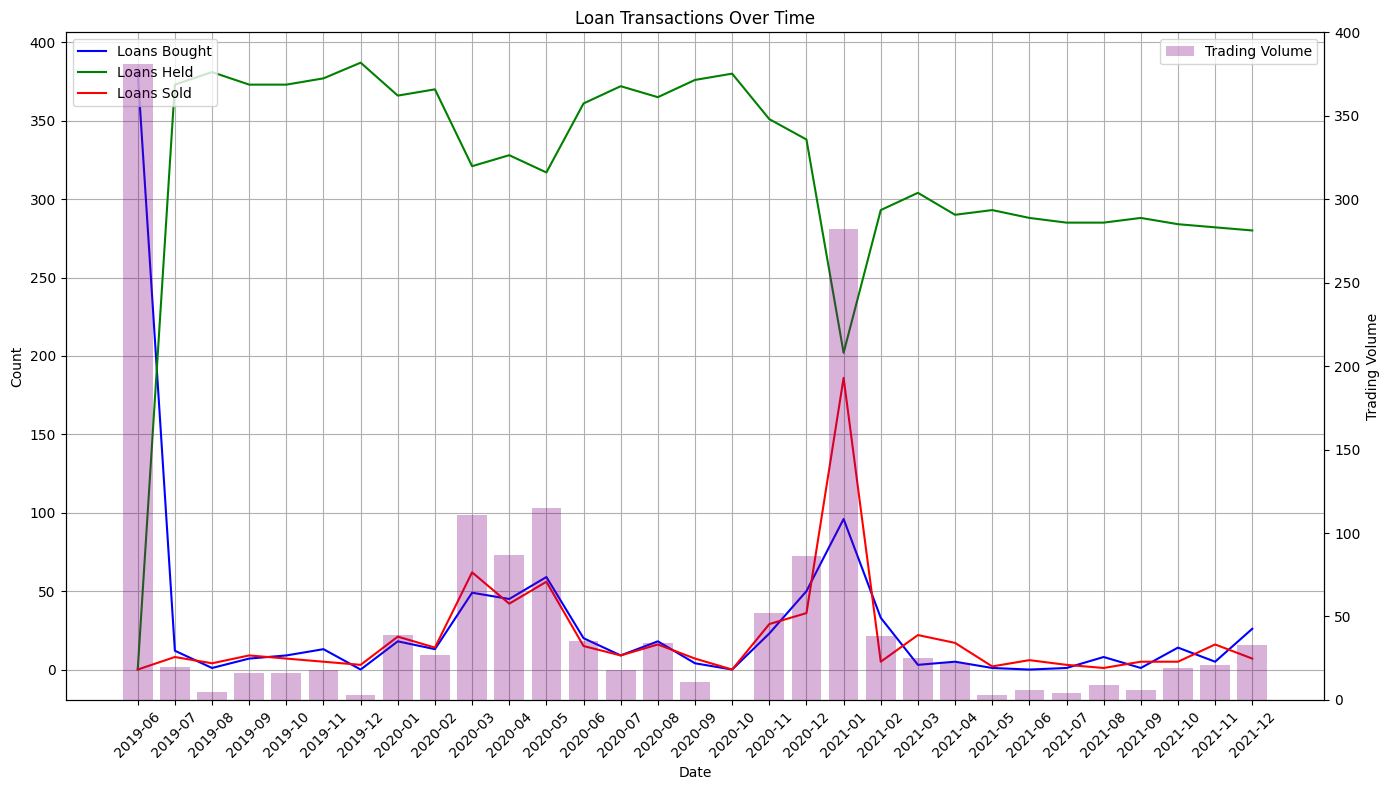

<Figure size 640x480 with 0 Axes>

In [97]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(results_df['Date'], results_df['Loans Bought'], label='Loans Bought', color='blue')
ax1.plot(results_df['Date'], results_df['Loans Held'], label='Loans Held', color='green')
ax1.plot(results_df['Date'], results_df['Loans Sold'], label='Loans Sold', color='red')
ax1.set_xlabel('Date')
ax1.set_xticklabels(results_df['Date'], rotation=45)
ax1.set_ylabel('Count')
ax1.set_title('Loan Transactions Over Time')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.bar(results_df['Date'], results_df['Trading Volume'], label='Trading Volume', color='purple', alpha=0.3)
ax2.set_ylabel('Trading Volume')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

plt.savefig('../Plots/Loan_Transactions_Over_Time.png')

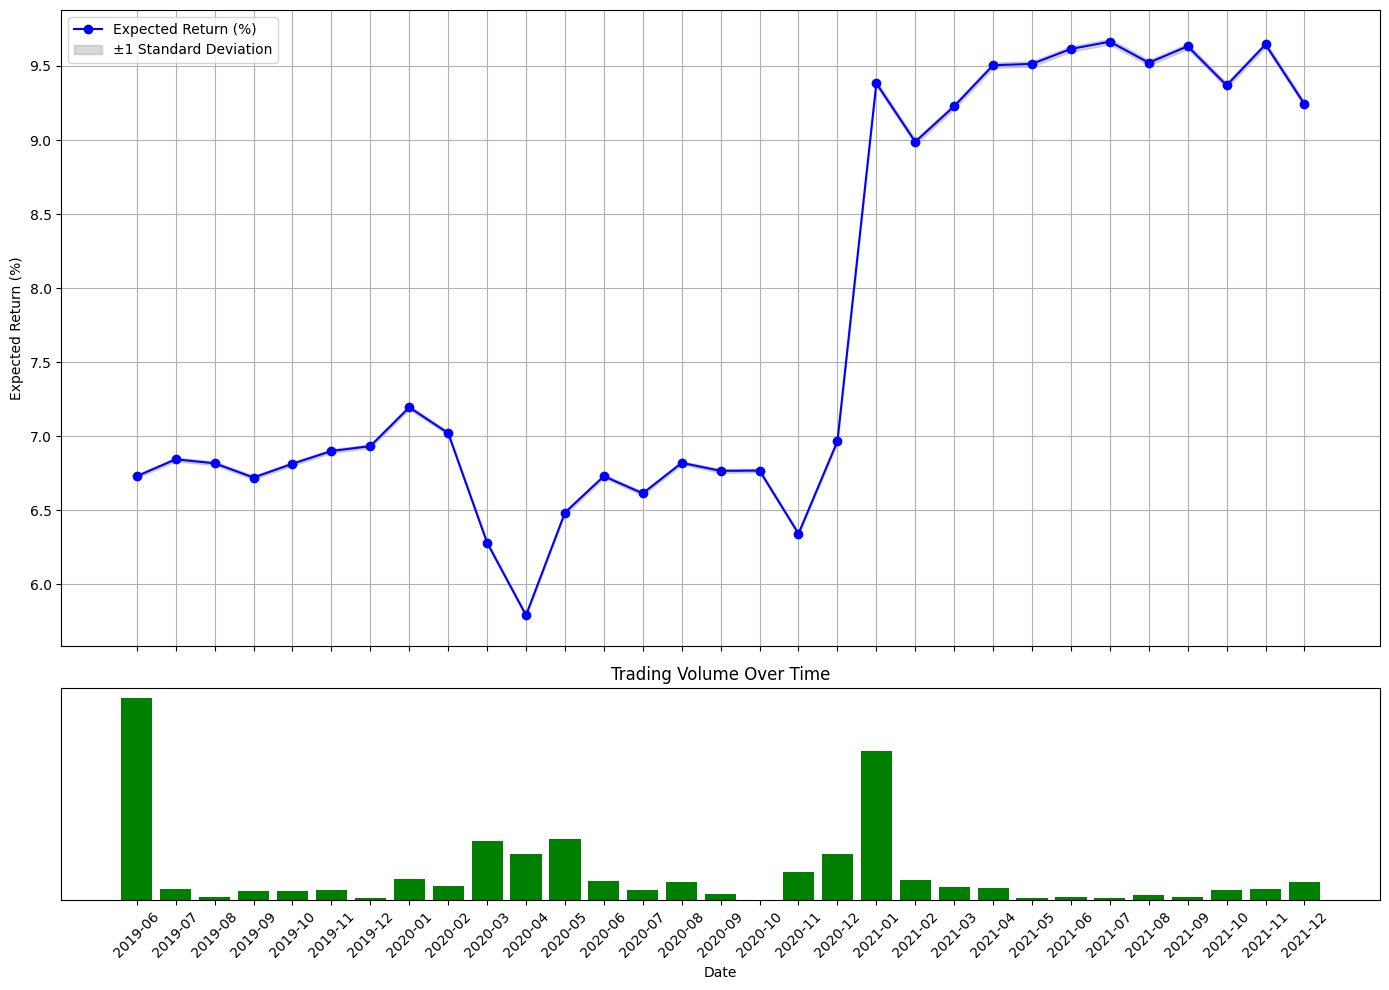

<Figure size 640x480 with 0 Axes>

In [124]:
# Calculate upper and lower boundaries
results_df['Upper Bound'] = results_df['Expected Return (%)'] + results_df['Standard Deviation']
results_df['Lower Bound'] = results_df['Expected Return (%)'] - results_df['Standard Deviation']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plotting Expected Return (%) over time with Standard Deviation boundaries
ax1.plot(results_df['Date'], results_df['Expected Return (%)'], marker='o', linestyle='-', color='b', label='Expected Return (%)')
ax1.fill_between(results_df['Date'], results_df['Lower Bound'], results_df['Upper Bound'], color='gray', alpha=0.3, label='±1 Standard Deviation')
ax1.set_ylabel('Expected Return (%)')
ax1.legend(loc='upper left')
ax1.grid(True)


# Plotting Trading Volume over time as bars
ax2.bar(results_df['Date'], results_df['Trading Volume'], color='g')
ax2.set_title('Trading Volume Over Time')
ax2.set_xlabel('Date')
ax2.grid(False)
ax2.set_xticks(results_df['Date'])
ax2.set_xticklabels(results_df['Date'], rotation=45)
ax2.yaxis.set_ticks([])  # Remove y-axis ticks

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

plt.savefig('../Plots/Expected_Return_and_Trading_Volume_Over_Time.png')

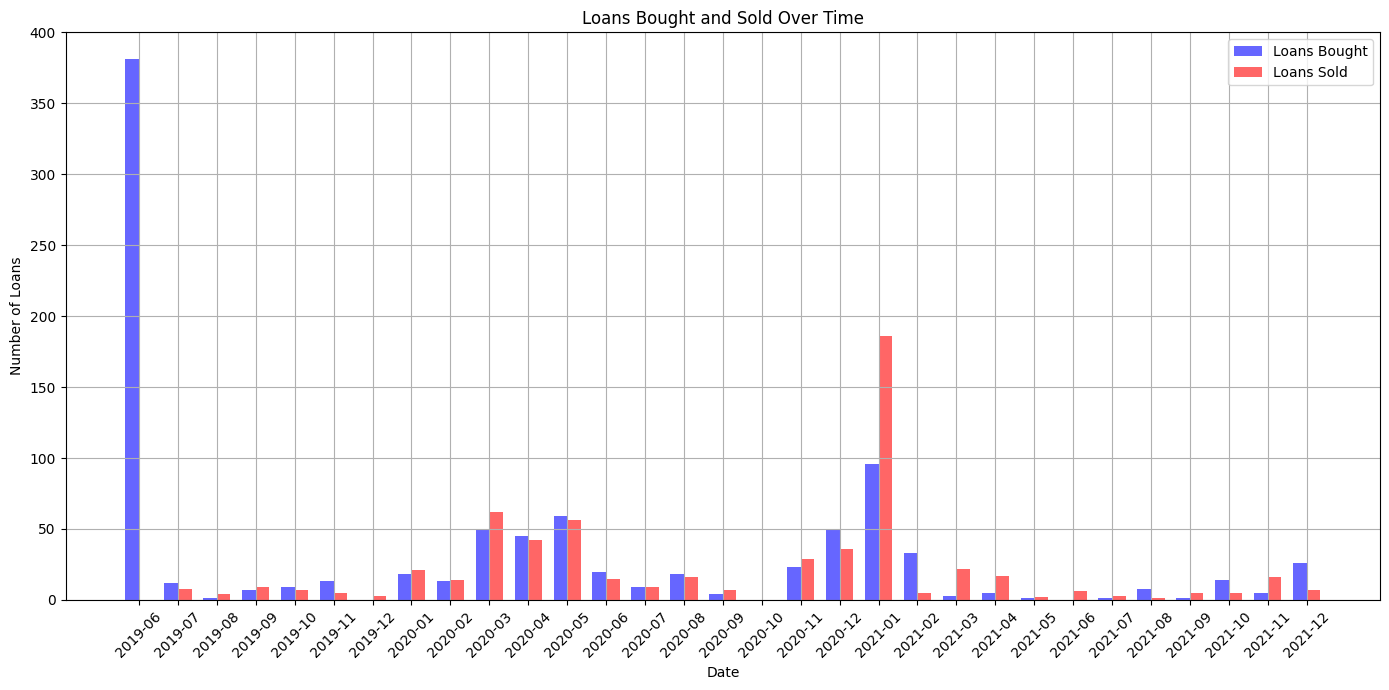

<Figure size 640x480 with 0 Axes>

In [99]:
# Create an array of positions for the x-axis
x = np.arange(len(results_df['Date']))

# Define the width of the bars
width = 0.35

# Plotting Loans Bought and Loans Sold side by side
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting Loans Bought
ax.bar(x - width/2, results_df['Loans Bought'], width, label='Loans Bought', color='blue', alpha=0.6)

# Plotting Loans Sold
ax.bar(x + width/2, results_df['Loans Sold'], width, label='Loans Sold', color='red', alpha=0.6)

# Adding labels, title and legend
ax.set_xlabel('Date')
ax.set_ylabel('Number of Loans')
ax.set_title('Loans Bought and Sold Over Time')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Date'], rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()

plt.savefig('../Plots/Loans_Bought_Sold_Over_Time.png')